# MNIST Digit Classification Using Multiple Models

This project explores different machine learning and deep learning models to classify handwritten digits from the **MNIST dataset**.


## Table of Contents
- [Dataset](#dataset)
- [Data Preprocessing](#data-preprocessing)
- [Data Visualization](#data-visualization)
- [K-Nearest Neighbors (KNN) Model](#k-nearest-neighbors-knn-model)
- [Support Vector Machine (SVM) Model](#support-vector-machine-svm-model)
- [Random Forest Model](#random-forest-model)
- [Convolutional Neural Network (CNN) Model](#convolutional-neural-network-cnn-model)

In [40]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
import seaborn as sns
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from tensorflow.keras.utils import to_categorical
import tensorflow as tf
from tensorflow.keras import layers, models

## Dataset
The **MNIST dataset** contains 70,000 grayscale images of handwritten digits (0-9).  
Each image is **28x28 pixels** (flattened into 784 features), with the first column representing the digit label.


## Data Preprocessing

### Load Data

In [32]:
(x_, y_), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_ = x_.reshape(x_.shape[0], -1)
x_test = x_test.reshape(x_test.shape[0], -1)
x_ = x_.astype(np.float32)
x_test = x_test.astype(np.float32)
print(x_.shape, y_.shape)
print(x_test.shape, y_test.shape)


(60000, 784) (60000,)
(10000, 784) (10000,)


### Split data

In [33]:

x_train,x_val,y_train,y_val = train_test_split(x_,y_,test_size=0.2, random_state=42)
print(x_train.shape,y_train.shape)
print(x_val.shape,y_val.shape)
print(x_test.shape,y_test.shape)

(48000, 784) (48000,)
(12000, 784) (12000,)
(10000, 784) (10000,)


## Data Visualization

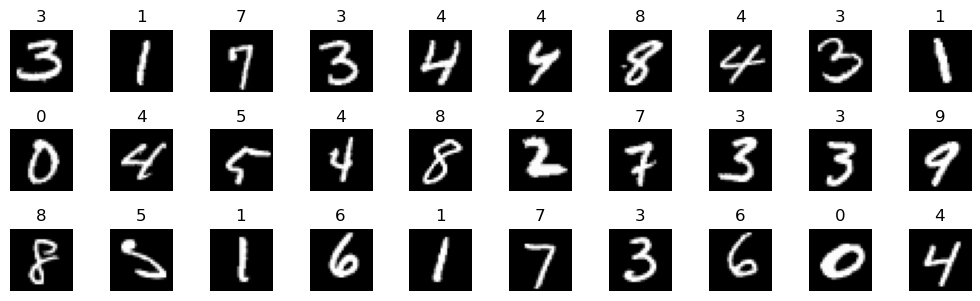

In [10]:
m, n = x_test.shape
fig, axes = plt.subplots(3, 10, figsize=(10, 3))
fig.tight_layout(pad=0.1)

for i, ax in enumerate(axes.flat):
    # Select random indices
    random_index = np.random.randint(m)
    # reshape the image
    X_random_reshaped = x_test[random_index].reshape((28, 28))
    # Display the image
    ax.imshow(X_random_reshaped, cmap='gray')
    # Display the label above the image
    ax.set_title(f"{y_test[random_index]}")
    ax.set_axis_off() 
plt.show()

## K-Nearest Neighbors (KNN) Model

### Hyperparameter Tuning for KNN

In [6]:
parameters = {'n_neighbors':[4,13,25],'weights':['uniform','distance']}
knn = KNeighborsClassifier()
gridSearch = GridSearchCV(knn, parameters, cv=5, scoring='accuracy',verbose=4)
gridSearch.fit(x_train,y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV 1/5] END ....n_neighbors=4, weights=uniform;, score=0.967 total time=  10.8s
[CV 2/5] END ....n_neighbors=4, weights=uniform;, score=0.966 total time=  10.5s
[CV 3/5] END ....n_neighbors=4, weights=uniform;, score=0.965 total time=  10.6s
[CV 4/5] END ....n_neighbors=4, weights=uniform;, score=0.967 total time=  10.2s
[CV 5/5] END ....n_neighbors=4, weights=uniform;, score=0.968 total time=  10.6s
[CV 1/5] END ...n_neighbors=4, weights=distance;, score=0.972 total time=  10.2s
[CV 2/5] END ...n_neighbors=4, weights=distance;, score=0.970 total time=  10.2s
[CV 3/5] END ...n_neighbors=4, weights=distance;, score=0.969 total time=  10.1s
[CV 4/5] END ...n_neighbors=4, weights=distance;, score=0.971 total time=   9.7s
[CV 5/5] END ...n_neighbors=4, weights=distance;, score=0.971 total time=  10.1s
[CV 1/5] END ...n_neighbors=13, weights=uniform;, score=0.962 total time=  10.6s
[CV 2/5] END ...n_neighbors=13, weights=uniform;,

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [4, 13, 25],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy', verbose=4)

In [7]:
print(gridSearch.best_params_)
model = gridSearch.best_estimator_

{'n_neighbors': 4, 'weights': 'distance'}


In [14]:
model.fit(x_train,y_train)
y_pred = model.predict(x_val)
print(accuracy_score(y_val,y_pred))
y_pred = model.predict(x_test)
print(accuracy_score(y_test,y_pred))   
print(f'Precision score: {precision_score(y_test,y_pred,average="macro")}')
print(f'Recall score: {recall_score(y_test,y_pred,average="macro")}')
print(f'F1 score: {f1_score(y_test,y_pred,average="macro")}')

0.9639333333333333
0.9643
Precision score: 0.9642017228794846
Recall score: 0.9640047107186384
F1 score: 0.9640792483713568


In [33]:
wrong_predictions = []
for i in range(len(y_test)):
    if y_test[i] != y_pred[i] and len(wrong_predictions) < 10:
        wrong_predictions.append(i)
print(f'Wrong predictions : {y_pred[wrong_predictions[0:10]]},{y_test[wrong_predictions[0:10]]}')
print(f'Right predictions : {y_pred[0:10]},{y_test[0:10]}')

Wrong predictions : [7 8 8 6 0 3 7 7 3 4],[2 2 9 4 6 2 9 2 5 6]
Right predictions : [7 2 1 0 4 1 4 9 5 9],[7 2 1 0 4 1 4 9 5 9]


## Support Vector Machine (SVM) Model

In [15]:
svc = svm.SVC(gamma='scale')
svc.fit(x_train,y_train)
y_pred = svc.predict(x_val)
print(accuracy_score(y_val,y_pred))
y_pred = svc.predict(x_test)
print(accuracy_score(y_test,y_pred))
print(f'Precision score: {precision_score(y_test,y_pred,average="macro")}')
print(f'Recall score: {recall_score(y_test,y_pred,average="macro")}')
print(f'F1 score: {f1_score(y_test,y_pred,average="macro")}')

0.9772666666666666
0.9763
Precision score: 0.9763364220530526
Recall score: 0.9761560799116502
F1 score: 0.9762229611238571


In [34]:
wrong_predictions = []
for i in range(len(y_test)):
    if y_test[i] != y_pred[i] and len(wrong_predictions) < 10:
        wrong_predictions.append(i)
print(f'Wrong predictions : {y_pred[wrong_predictions[0:10]]},{y_test[wrong_predictions[0:10]]}')
print(f'Right predictions : {y_pred[0:10]},{y_test[0:10]}')

Wrong predictions : [7 8 8 6 0 3 7 7 3 4],[2 2 9 4 6 2 9 2 5 6]
Right predictions : [7 2 1 0 4 1 4 9 5 9],[7 2 1 0 4 1 4 9 5 9]


## Random Forest Model

### Hyperparameter Tuning for Random Forest

In [11]:
parameters = {
    'n_estimators': [50, 100, 150], 
    'max_depth': [5, 10, 15],  
    'min_samples_split': [2, 5, 10],
}
ranForest_classifier = RandomForestClassifier()
gridsearch = GridSearchCV(ranForest_classifier,parameters,cv= 3,scoring='accuracy',verbose= 4)
gridsearch.fit(x_train, y_train)

Fitting 3 folds for each of 27 candidates, totalling 81 fits
[CV 1/3] END max_depth=5, min_samples_split=2, n_estimators=50;, score=0.859 total time=   5.5s
[CV 2/3] END max_depth=5, min_samples_split=2, n_estimators=50;, score=0.851 total time=   5.5s
[CV 3/3] END max_depth=5, min_samples_split=2, n_estimators=50;, score=0.849 total time=   5.4s
[CV 1/3] END max_depth=5, min_samples_split=2, n_estimators=100;, score=0.861 total time=  10.8s
[CV 2/3] END max_depth=5, min_samples_split=2, n_estimators=100;, score=0.856 total time=  10.8s
[CV 3/3] END max_depth=5, min_samples_split=2, n_estimators=100;, score=0.858 total time=  11.0s
[CV 1/3] END max_depth=5, min_samples_split=2, n_estimators=150;, score=0.862 total time=  16.2s
[CV 2/3] END max_depth=5, min_samples_split=2, n_estimators=150;, score=0.859 total time=  16.1s
[CV 3/3] END max_depth=5, min_samples_split=2, n_estimators=150;, score=0.860 total time=  16.1s
[CV 1/3] END max_depth=5, min_samples_split=5, n_estimators=50;, scor

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [5, 10, 15],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 150]},
             scoring='accuracy', verbose=4)

In [16]:
model = gridsearch.best_estimator_
model.fit(x_train,y_train)
y_pred = model.predict(x_val)
print(accuracy_score(y_val,y_pred))
y_pred = model.predict(x_test)
print(accuracy_score(y_test,y_pred))
print(f'Precision score: {precision_score(y_test,y_pred,average="macro")}')
print(f'Recall score: {recall_score(y_test,y_pred,average="macro")}')
print(f'F1 score: {f1_score(y_test,y_pred,average="macro")}')

0.9626666666666667
0.9646
Precision score: 0.9644389244588112
Recall score: 0.964268397150758
F1 score: 0.9643228689068476


In [35]:
wrong_predictions = []
for i in range(len(y_test)):
    if y_test[i] != y_pred[i] and len(wrong_predictions) < 10:
        wrong_predictions.append(i)
print(f'Wrong predictions : {y_pred[wrong_predictions[0:10]]},{y_test[wrong_predictions[0:10]]}')
print(f'Right predictions : {y_pred[0:10]},{y_test[0:10]}')

Wrong predictions : [7 8 8 6 0 3 7 7 3 4],[2 2 9 4 6 2 9 2 5 6]
Right predictions : [7 2 1 0 4 1 4 9 5 9],[7 2 1 0 4 1 4 9 5 9]


## Convolutional Neural Network (CNN) Model

### Reshape Data for CNN

In [34]:
x_train = x_train.reshape(-1, 28, 28, 1).astype("float32") / 255.0
x_test = x_test.reshape(-1, 28, 28, 1).astype("float32") / 255.0
x_val = x_val.reshape(-1, 28, 28, 1).astype("float32") / 255.0
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)
y_val = to_categorical(y_val, 10)


### Build and Train CNN

In [38]:
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

c:\Users\ramaa\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_24 (Conv2D)              │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_16 (MaxPooling2D) │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_25 (Conv2D)              │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_17 (MaxPooling2D) │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_26 (Conv2D)              │ (None, 3, 3, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_8 (Flatten)             │ (None, 576)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 128)            │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 130,890 (511.29 KB)

 Trainable params: 130,890 (511.29 KB)

 Non-trainable params: 0 (0.00 B)

In [39]:
early_stopping = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True) 
history = model.fit(x_train, y_train, epochs=10, batch_size=64, validation_data=(x_val, y_val), callbacks=[early_stopping])

test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_acc:.4f}")


Epoch 1/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 26s 31ms/step - accuracy: 0.8630 - loss: 0.4505 - val_accuracy: 0.9833 - val_loss: 0.0590
Epoch 2/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 24s 31ms/step - accuracy: 0.9814 - loss: 0.0588 - val_accuracy: 0.9846 - val_loss: 0.0493
Epoch 3/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 26s 34ms/step - accuracy: 0.9881 - loss: 0.0377 - val_accuracy: 0.9862 - val_loss: 0.0429
Epoch 4/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 25s 33ms/step - accuracy: 0.9905 - loss: 0.0294 - val_accuracy: 0.9900 - val_loss: 0.0389
Epoch 5/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 24s 32ms/step - accuracy: 0.9930 - loss: 0.0235 - val_accuracy: 0.9902 - val_loss: 0.0347
Epoch 6/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 23s 30ms/step - accuracy: 0.9943 - loss: 0.0166 - val_accuracy: 0.9903 - val_loss: 0.0375
Epoch 7/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 20s 27ms/step - accuracy: 0.9957 - loss: 0.0138 - val_accuracy: 0.9901 - val_loss: 0.0382
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9889 - loss: 0.0364
Test accuracy: 

### Plot Loss Curve

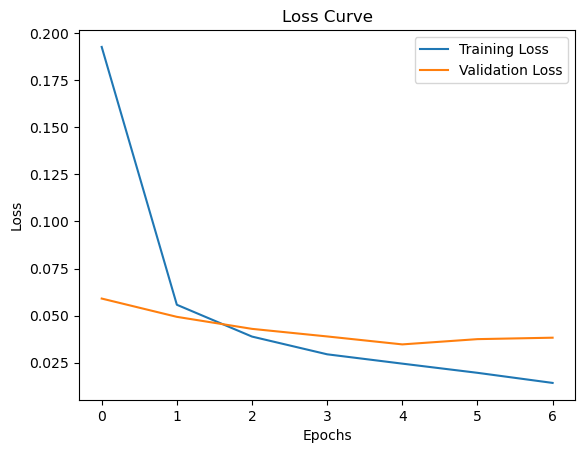

In [41]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Curve')
plt.legend()
plt.show()

In [42]:
y_pred_cnn = model.predict(x_test)
y_pred_cnn_labels = np.argmax(y_pred_cnn, axis=1)
y_test_labels = np.argmax(y_test, axis=1)

print(f'Accuracy: {accuracy_score(y_test_labels, y_pred_cnn_labels):.4f}')
print(f'Precision: {precision_score(y_test_labels, y_pred_cnn_labels, average="macro"):.4f}')
print(f'Recall: {recall_score(y_test_labels, y_pred_cnn_labels, average="macro"):.4f}')
print(f'F1 Score: {f1_score(y_test_labels, y_pred_cnn_labels, average="macro"):.4f}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step
Accuracy: 0.9909
Precision: 0.9909
Recall: 0.9908
F1 Score: 0.9909


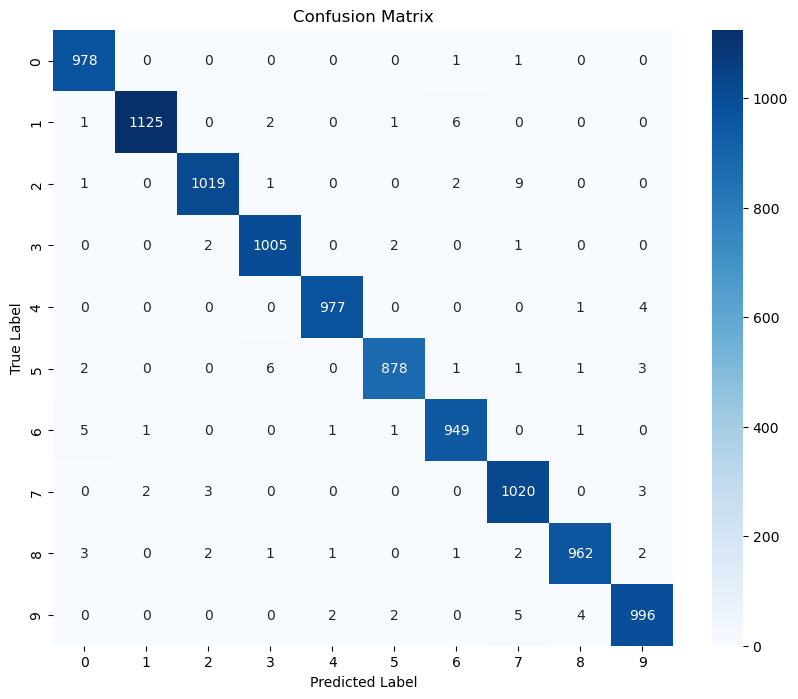

In [43]:
conf_matrix = confusion_matrix(y_test_labels, y_pred_cnn_labels)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=range(10), yticklabels=range(10))
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()